In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import ticker

In [2]:
mwTQ_PATH = '/pscratch/sd/h/heroplr/R2_analysis_all/'
mwTQ = xr.open_mfdataset(mwTQ_PATH+'tep2_lot-101_trial_0028.best.h5_mwvaave2.nc')

In [3]:
lon = mwTQ.lon.values
lat = mwTQ.lat.values
mwT_rmse = mwTQ.Trmsemean.values
mwQ_rmse = mwTQ.Qrmsemean.values

In [16]:
mwT_rmse

array([[2.88586166e-05, 2.88586166e-05, 2.88586166e-05, ...,
        2.73892022e-05, 2.73892022e-05, 2.73892022e-05],
       [2.88586166e-05, 2.88586166e-05, 2.88586166e-05, ...,
        2.73892022e-05, 2.73892022e-05, 2.73892022e-05],
       [2.88586166e-05, 2.88586166e-05, 2.88586166e-05, ...,
        2.73892022e-05, 2.73892022e-05, 2.73892022e-05],
       ...,
       [2.92313698e-05, 2.92313698e-05, 2.92313698e-05, ...,
        3.37354264e-05, 3.37354264e-05, 3.37354264e-05],
       [2.92313698e-05, 2.92313698e-05, 2.92313698e-05, ...,
        3.37354264e-05, 3.37354264e-05, 3.37354264e-05],
       [2.92313698e-05, 2.92313698e-05, 2.92313698e-05, ...,
        3.37354264e-05, 3.37354264e-05, 3.37354264e-05]])

In [4]:
mwQ_rmse

array([[0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       [0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       [0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       ...,
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ],
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ],
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ]])

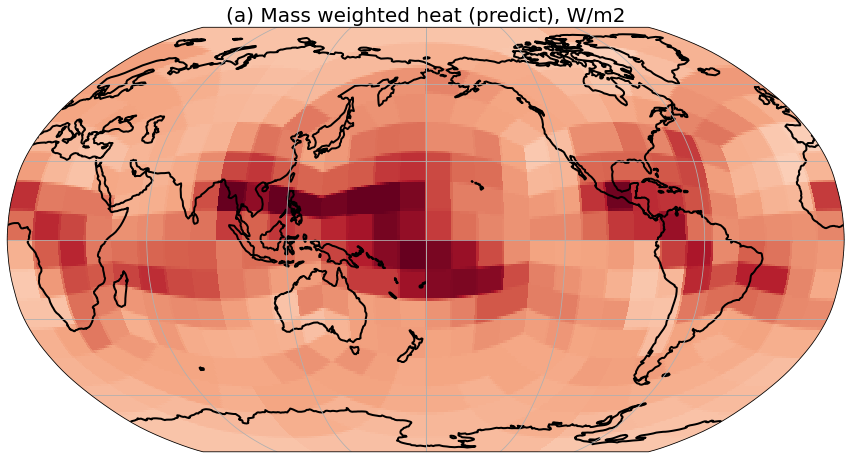

In [9]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
fz = 20
contour_plot = ax.pcolormesh(lon, lat, mwT_rmse,cmap='RdBu_r', vmin = -0.0001, vmax = 0.0001, transform=ccrs.PlateCarree())
ax.set_title('(a) Mass weighted heat (predict), W/m2', fontsize = fz)
ax.coastlines(linewidth=2.0,edgecolor='0.25')
ax.gridlines()


plt.subplots_adjust(hspace=0.13)
plt.savefig('RMSE_Heat.pdf')

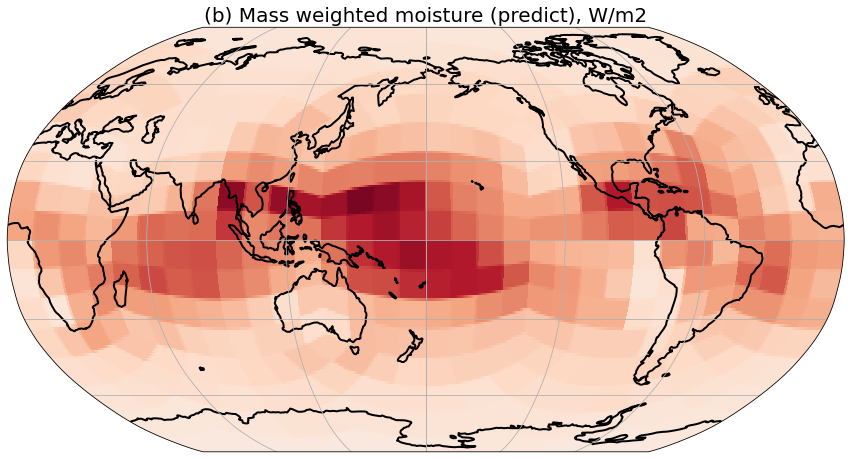

In [15]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
fz = 20
contour_plot = ax.pcolormesh(lon, lat, mwQ_rmse,cmap='RdBu_r', vmin = -0.5, vmax = 0.5, transform=ccrs.PlateCarree())
ax.set_title('(b) Mass weighted moisture (predict), W/m2', fontsize = fz)
ax.coastlines(linewidth=2.0,edgecolor='0.25')
ax.gridlines()


plt.subplots_adjust(hspace=0.13)
plt.savefig('RMSE_Moisture.pdf')

In [12]:
mwQ_rmse

array([[0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       [0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       [0.0526707 , 0.0526707 , 0.0526707 , ..., 0.05123112, 0.05123112,
        0.05123112],
       ...,
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ],
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ],
       [0.06608998, 0.06608998, 0.06608998, ..., 0.0677462 , 0.0677462 ,
        0.0677462 ]])